# TP 2 LABORATORIO
### Juan Ignacio Jimenez Copati

Para este trabajo práctico de laboratorio, se nos pidió diseñar ciertos tipos de filtros digitales

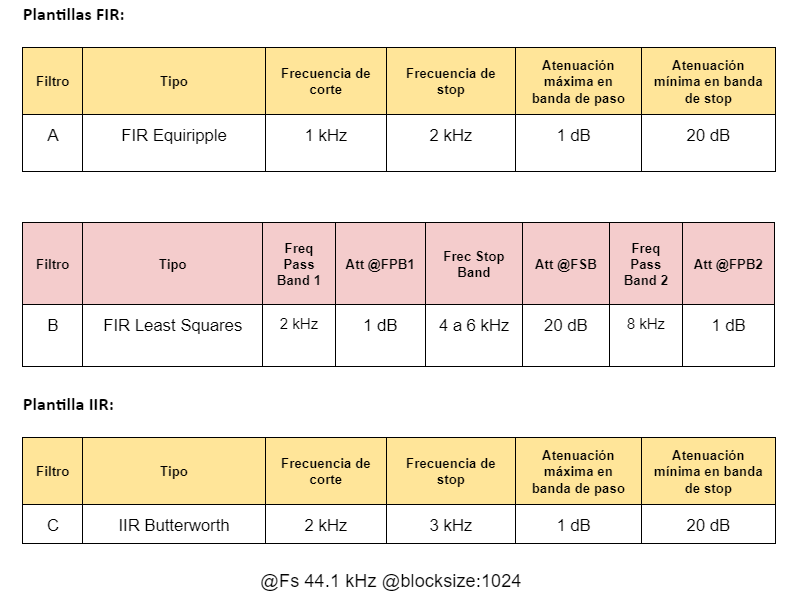

# Fase de simulación

## Python

In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, plot_plantilla

## FIR Equiripple

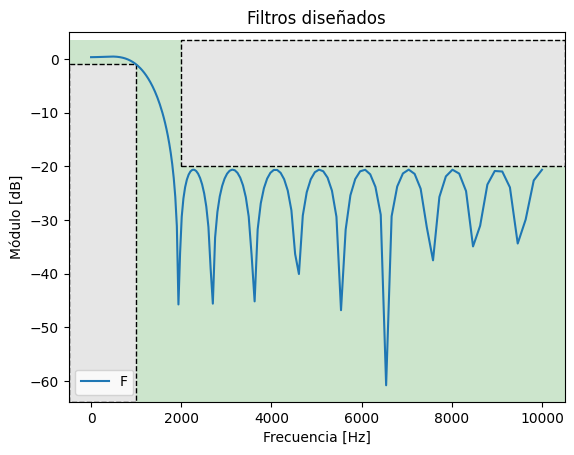

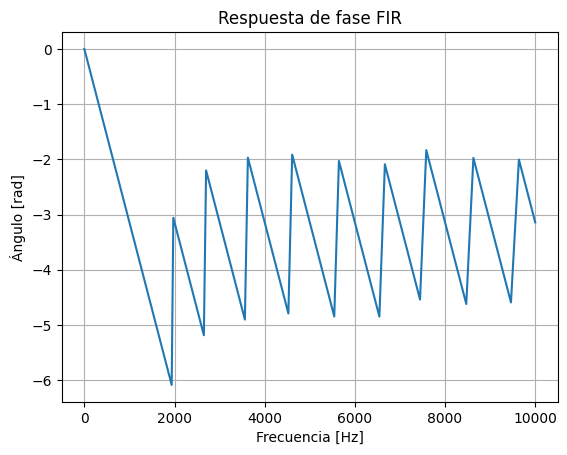

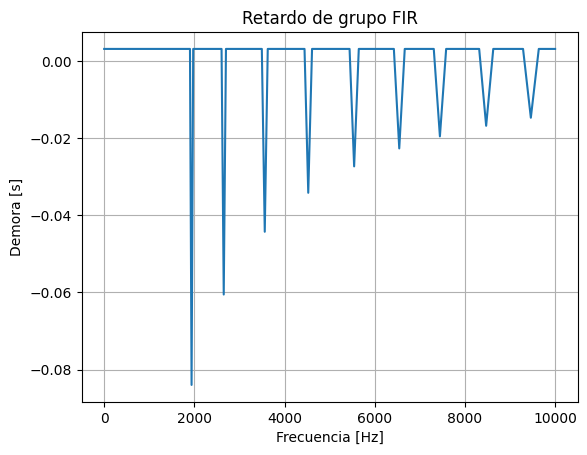

In [4]:
# Funcion para obtener el retardo de grupo
def group_delay(ww, phase):
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

# Plantilla
f_pass = 1e3
f_stop = 2e3
at_pass = 1
at_stop = 20
fs = 40e3
f_nyq = fs/2

# Coeficientes
# ORDEN 40 - MINIMO PYFDA
num_fir = np.array([-0.050179654958618175,-0.007232230497245624,-0.006729671092117824,-0.005454664497948991,-0.003357525987325359,-0.00042078646823785727,0.0033445341942376144,0.007890576017605169,0.0131364342837594,0.018968622582374167,0.02523913570501457,0.031779725328537956,0.03839700770268516,0.04488580119084945,0.051042296811244274,0.05666119204866031,0.061552401856943155,0.06554736072424443,0.06850748491905205,0.07032651885189414,0.07094048098981227,0.07032651885189414,0.06850748491905205,0.06554736072424443,0.061552401856943155,0.05666119204866031,0.051042296811244274,0.04488580119084945,0.03839700770268516,0.031779725328537956,0.02523913570501457,0.018968622582374167,0.0131364342837594,0.007890576017605169,0.0033445341942376144,-0.00042078646823785727,-0.003357525987325359,-0.005454664497948991,-0.006729671092117824,-0.007232230497245624,-0.050179654958618175])
den_fir = 1

# Vector de frecuencias
w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

# Respuesta en frecuencia
_, h = sig.freqz(num_fir, den_fir, w)

w = w / np.pi * f_nyq

# Modulo
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='FIR')
plt.legend('FIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
fase_fir = np.unwrap(np.angle(h))
plt.plot(w, fase_fir)
plt.grid(which='both', axis='both')


# Retardo de grupo
gd_iir = group_delay(w, fase_fir)
plt.figure()
plt.title('Retardo de grupo FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')

## IIR Butter

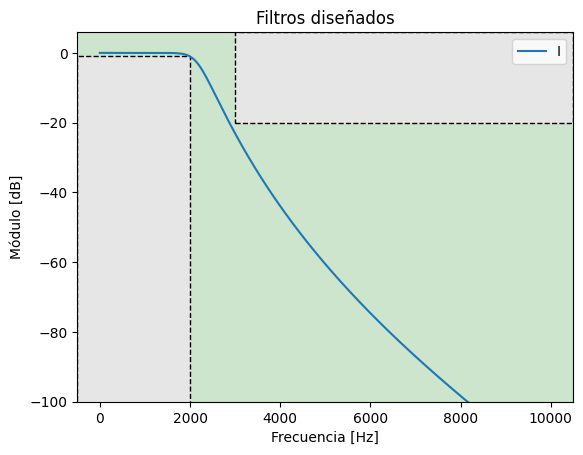

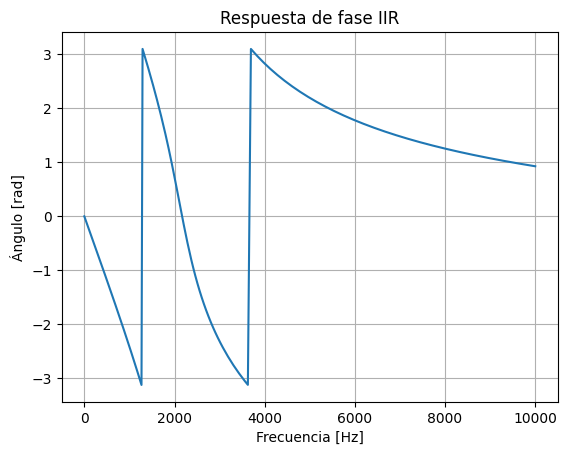

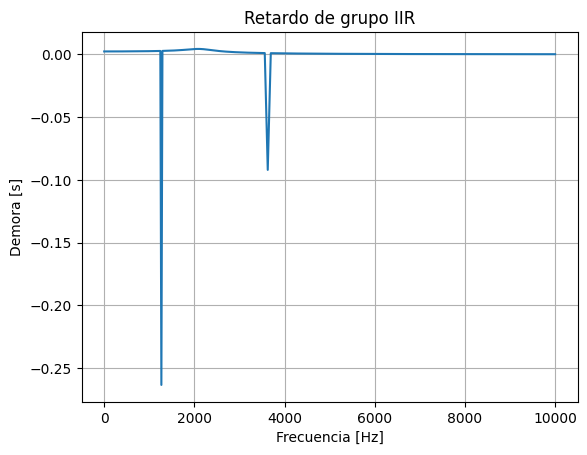

In [5]:
# Plantilla
f_pass = 2e3
f_stop = 3e3
at_pass = 1
at_stop = 20
fs = 44e3
f_nyq = fs/2

# Coeficientes
num_iir = np.array([1.5866236489781e-07,1.26929891918248e-06,4.442546217138679e-06,8.885092434277359e-06,1.1106365542846699e-05,8.885092434277359e-06,4.44254621713868e-06,1.26929891918248e-06,1.5866236489781e-07])
den_iir = np.array([1.0,-6.413306608385417,18.12542897301968,-29.465989614914925,30.120651762703893,-19.81618064656616,8.190625602136983,-1.9439664239390542,0.2027775735104071])

w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

_, h = sig.freqz(num_iir, den_iir, w)

w = w / np.pi * f_nyq

# Modulo
#plt.axis([0, 100, -60, 5 ]);
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='IIR')
plt.legend('IIR')
plot_plantilla(filter_type = 'lowpass', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
#fase_iir = np.unwrap(np.angle(h))
fase_iir = np.angle(h)
plt.plot(w, fase_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -25, 5 ]);

# Retardo
gd_iir = group_delay(w, fase_iir)
plt.figure()
plt.title('Retardo de grupo IIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w,gd_iir)
plt.grid(which='both', axis='both')
#plt.xlim(0, 100)
#plt.axis([0, 100, -2, 7 ]);

## FIR LEAST SQUARES

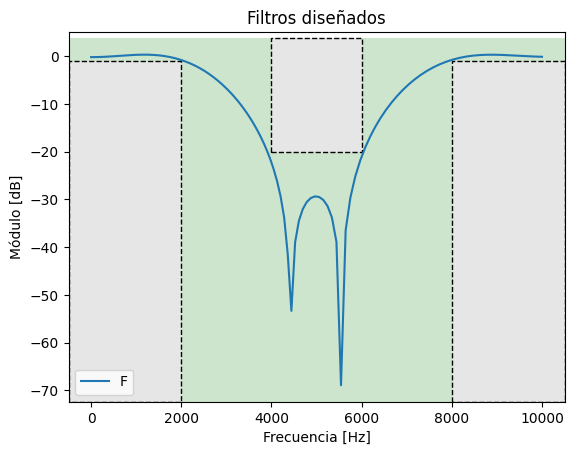

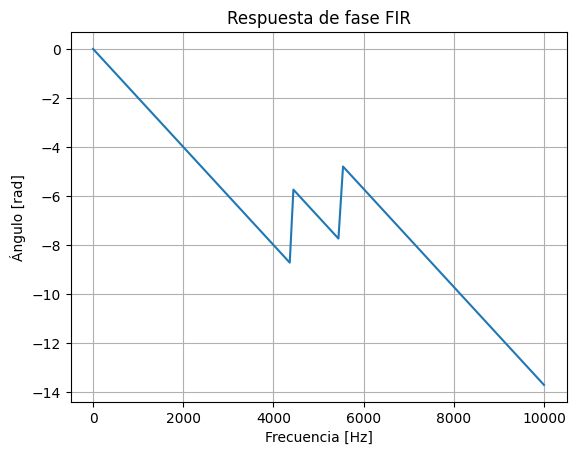

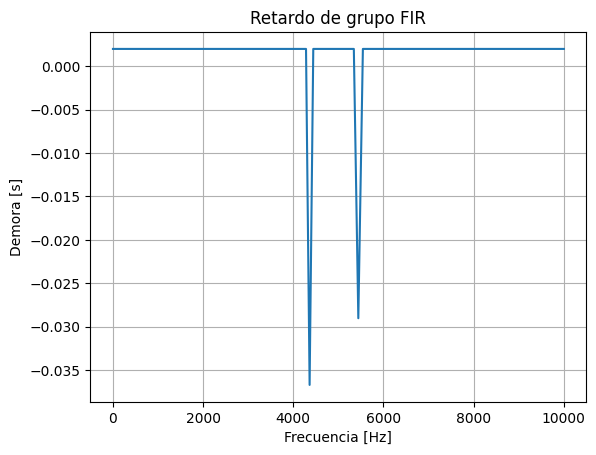

In [6]:
# Plantilla
f_pass = [2e3,8e3]
f_stop = [4e3,6e3]
at_pass = 1
at_stop = 20
fs = 44e3
f_nyq = fs/2

# Coeficientes
# ORDEN 40 - MINIMO PYFDA
num_fir = np.array([-0.011987500035322729  ,                
-0.013208274635586841  ,              
-0.006362678992969658  ,               
-0.00016630584191297334,             
-0.0060615123330977376 ,              
-0.024002019776280178  ,              
-0.035821425360649084  ,              
-0.017079421357370676  ,              
 0.038611566577769214  ,              
 0.10411612849690909   ,              
 0.13068077081083193   ,              
 0.083582385292914924  ,             
-0.025401613337691916  ,           
-0.13775476126202793   ,           
 0.81478994300792429   ,              
-0.13775476126202793   ,              
-0.025401613337691916  ,              
 0.083582385292914924  ,              
 0.13068077081083193   ,              
 0.10411612849690909   ,              
 0.038611566577769214  ,              
-0.017079421357370676  ,              
-0.035821425360649084  ,              
-0.024002019776280178  ,              
-0.0060615123330977376 ,              
-0.00016630584191297334,              
-0.006362678992969658  ,              
-0.013208274635586841  ,              
-0.011987500035322729      ])
den_fir = 1

# Vector de frecuencias
w = np.logspace(-4, 4, 1000) / f_nyq * np.pi

# Respuesta en frecuencia
_, h = sig.freqz(num_fir, den_fir, w)

w = w / np.pi * f_nyq

# Modulo
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.plot(w, 20 * np.log10(np.abs(h)), label='FIR')
plt.legend('FIR')
plot_plantilla(filter_type = 'bandstop', fpass = f_pass, ripple = at_pass , fstop = f_stop, attenuation = at_stop, fs = fs)

# Fase
plt.figure()
plt.title('Respuesta de fase FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ángulo [rad]')
fase_fir = np.unwrap(np.angle(h))
plt.plot(w, fase_fir)
plt.grid(which='both', axis='both')


# Retardo de grupo
gd_iir = group_delay(w, fase_fir)
plt.figure()
plt.title('Retardo de grupo FIR')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Demora [s]')
plt.plot(w, gd_iir)
plt.grid(which='both', axis='both')